### Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой
#### 1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "./data/HR.csv"
df = pd.read_csv(file_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:
+ **satisfaction_level** - Уровень удовлетворенности работой
+ **Last_evaluation** - Время с момента последней оценки в годах
+ **number_projects** - Количество проектов, выполненных за время работы
+ **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
+ **time_spend_company** - Стаж работы в компании в годах
+ **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
+ **left** - уволился ли сотрудник
+ **promotion_last_5years** - повышался ли сотрудник за последние пять лет
+ **department** - отдел в котором работает сотрудник
+ **salary** - относительный уровень зарплаты

#### 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [6]:
def numeric_df(data):
  return df.select_dtypes(include=['float64', 'int64'])

def main_stats_results(data):
  data = numeric_df(data)
  stats = pd.DataFrame({'name': ['min', 'max', 'mean', 'median','moda','std']})
  for col in data.columns:
    val =  [data[col].min(), data[col].max(), data[col].mean(), data[col].median(), data[col].mode()[0], data[col].std()]
    stats.insert(loc=len(stats.columns) , column=col, value=val)
  return stats
    
df_stats = main_stats_results(df)
df_stats.head(6)


,name,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
1,max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
2,mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
3,median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
4,moda,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000
5,std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281


#### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

<AxesSubplot:>

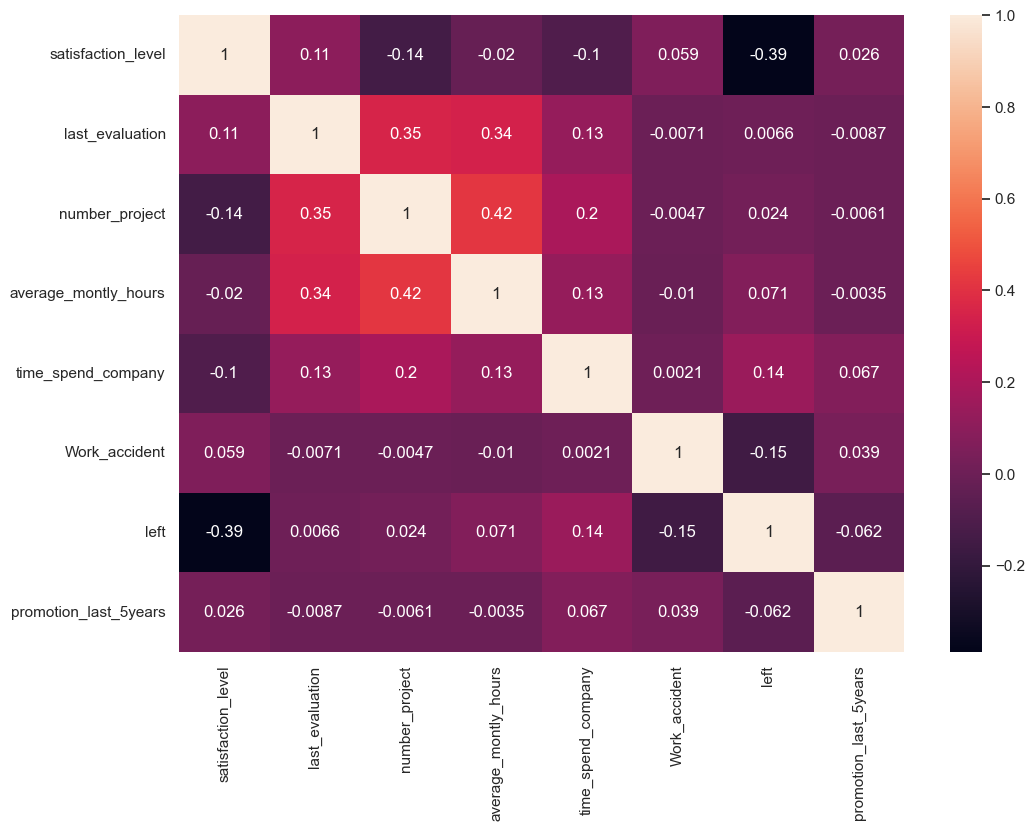

In [7]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(numeric_df(df).corr(), annot=True)

Самая выраженная корреляция видна между столбцами:
```
['average_monthly_hours'] и ['number_projects']
['left'] и ['satisfaction_level']
```
Прямая корреляция:<br>
**Чем больше часов отработки в месяц тем больше проектов сдано сотрудником**<br>
Обратная корреляция:<br>
**между уровнем удовлетворения от работы и фактом увольнения**
<br><br>
Самая низкая корреляция между:<br>
```
['last_evaluation'] и ['promotion_last_5years']
['Work_accident'] и ['last_evaluation']
```

#### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [8]:
df[['department']].groupby('department').value_counts()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

#### 5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:xlabel='salary', ylabel='count'>

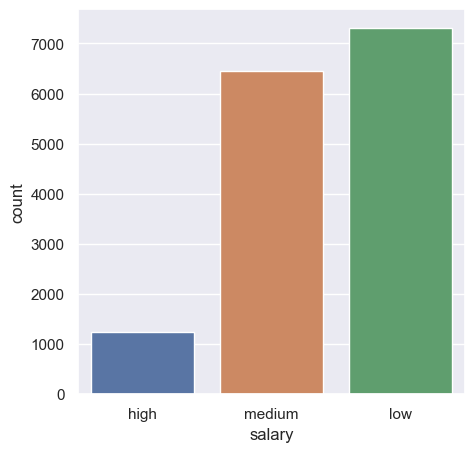

In [10]:
df_salary = pd.DataFrame(df[['salary']].groupby('salary').value_counts().reset_index())
df_salary.columns = ['salary','count']
df_salary = df_salary.sort_values('count',ascending=True)
sns.set(rc={'figure.figsize':(5, 5)})
sns.barplot(x='salary', y='count', data=df_salary)

#### 5.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

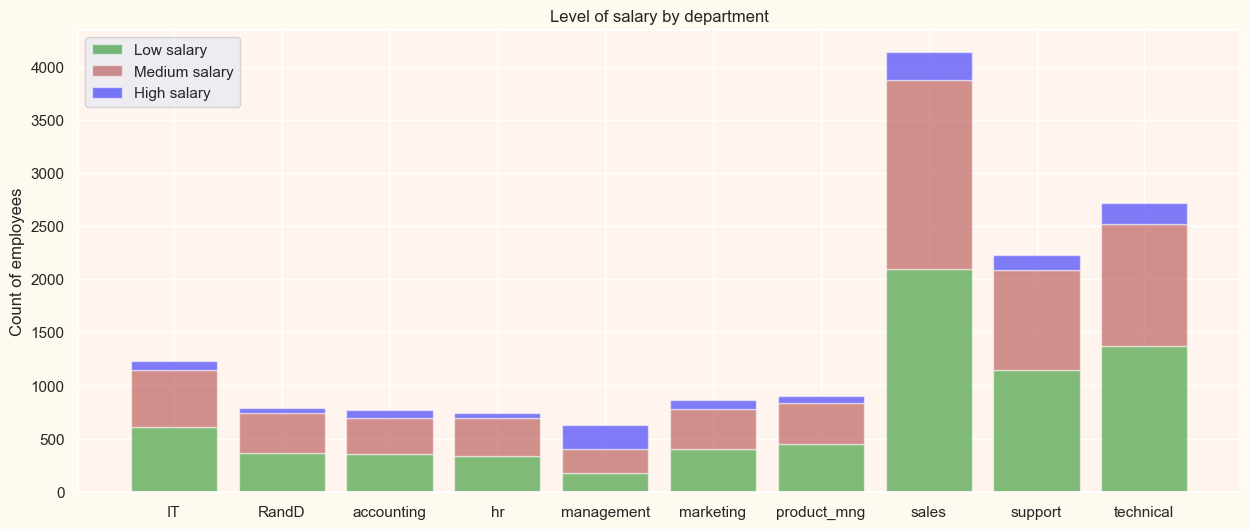

In [11]:
departments = pd.DataFrame(df[['department','salary']].groupby(['department','salary']).value_counts().reset_index())
dep_ = departments[['department']].groupby('department').value_counts().reset_index()

fig, ax = plt.subplots()

for dep in dep_['department']:
  level_ = dict()
  for level in df_salary['salary'].head().tolist():  
    level_[level] = departments[0].loc[(departments['department']== dep) & (departments['salary']==level)].tolist()[0] 

  ax.bar(dep, level_['low'], color = "green", label = dep, alpha = 0.5)
  ax.bar(dep, level_['medium'], bottom = level_['low'], color = "brown", alpha = 0.5)
  ax.bar(dep, level_['high'], bottom = level_['medium']+level_['low'], color = "blue", alpha = 0.5)

plt.title("Level of salary by department")
plt.ylabel("Count of employees")
plt.legend(["Low salary", "Medium salary", "High salary"], loc ="upper left")

ax.set_facecolor('seashell')
fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

#### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [12]:
result = df.groupby(['salary']).agg({'average_montly_hours': ['min', 'mean', 'median','max']})
result.head()

average_montly_hours                        
                        min        mean median  max
salary                                             
high                     96  199.867421  199.0  307
low                      96  200.996583  199.0  310
medium                   96  201.338349  201.0  310

Больше всего времени проводят на работе сотрудники со среднем уровнем зараплат
<br>
Но тут возникают вопросы, что значит "проводят время" на работе?<br>
Если фиксация по времени проведения в офисе, то это не совсем корректно. Сотрудники могут покидать место рабочее и быть на выездных встречах.

#### 8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
+ Доля сотрудников с повышением за последние 5 лет
+ Средняя степень удовлетворенности
+ Среднее количество проектов

In [13]:
up_and_left = len(df[( df['promotion_last_5years']==1) & (df['left']==1)])
up_and_work = len(df[( df['promotion_last_5years']==1) & (df['left']==0)])
all_left = len(df[(df['left']==1)])

up_employees = up_and_left + up_and_work

print(f"Общая доля сотрудников с повышением за 5 лет {up_employees/len(df):.2%}")
print(f"Доля уволившихся после повышения из тех кого повысили  {up_and_left/up_employees:.2%}")
print(f"Доля уволившихся после повышения из всех уволившихся  {up_and_left/all_left:.2%}")


Общая доля сотрудников с повышением за 5 лет 2.13%
Доля уволившихся после повышения из тех кого повысили  5.96%
Доля уволившихся после повышения из всех уволившихся  0.53%


In [14]:
result = df.groupby(['left']).agg({'satisfaction_level': ['mean']})
result.head()

,satisfaction_level
,mean
left,
0,0.666810
1,0.440098


In [15]:
result = df.groupby(['left']).agg({'number_project': ['mean']})
result.head()

,number_project
,mean
left,
0,3.786664
1,3.855503


#### 9. Разделить данные на тестовую и обучающую выборки.
+ Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) 
+ Оценить качество модели на тестовой выборки

In [16]:
from sklearn.model_selection import train_test_split

# убираем столбцы с низкой корреляцией c целевым полем left (Last_evaluation, number_projects)

X = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=55)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [18]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, lda.predict(X_test))
print(f"Точность предсказаний:{acc:.2%}")

Точность предсказаний:76.66%
